# Dataframe manipulation

In [1]:
import pandas as pd
import numpy as np 

#### setting the dataframe with pandas

In [2]:
df = pd.read_csv ('SeoulBikeData.csv') 

#### changing the features names

In [3]:
col_names = ['date' , 'rented_bike_count', 'hour' , 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point', 'solar_radiation','rainfall','snowfall', 'seasons','holiday','functioning_day']
df.columns = col_names
df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### getting rid of unwanted features
 axis = 1 means "drop from the columns"

In [4]:
df = df.drop(["date","holiday"],axis=1)

#### only getting the wanted values of some features :

In [5]:
df = df[df["hour"].isin([8,12,14])]
#alternative : df = df[(df["hour"] == 12) | (df["hour"] == 11)]


### Spliting the df into 3 dataframes :

In [6]:
#from sklearn.model_selection import train_test_split
train , valid , test = np.split (df.sample(frac=1) , [int(.6*len(df)) , int (.8*len(df))])
# may return some warnings about future versions of numpy

/home/mirija/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


## Getting X and y from the dataframe

In [7]:
def get_xy (dataframe , y_label , features = None):
    
    if features is None :
    # we take all the features except for the label
        X = df [[c for c in df.columns if c != y_label]].values
    
    else :
        
        if len (features) == 1:
    # just take the given feature and reshape it to a n*1 matrix
            X = df[features[0]].values.reshape (-1,1) #"-1" means the length of the "vector"
        
        else :
        
            X = df[features].values
    
    y = df[y_label].values.reshape(-1,1)
    
    data = np.hstack ((X,y))
    
    return data, X, y

### Getting X and y for train,valid,test

In [8]:
# this is an example for just one feature 
data_train , X_train, y_train = get_xy (train , "rented_bike_count" , features=["temperature"])
data_valid , X_valid, y_valid = get_xy (valid , "rented_bike_count",features=["temperature"])
data_test , X_test, y_test = get_xy (test , "rented_bike_count",features=["temperature"])

### Visualisation of the datapoints (plot)
note that this example is not completely linear

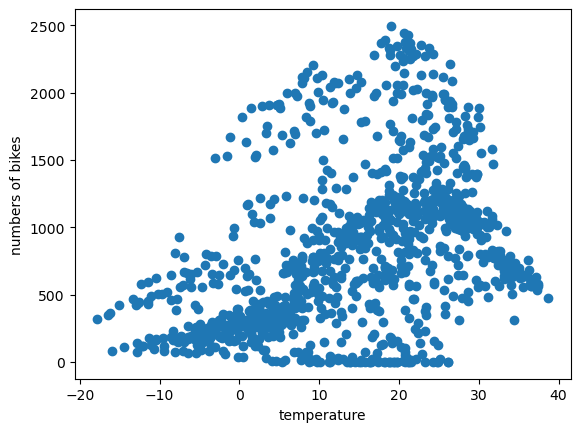

In [9]:
import matplotlib.pyplot as plt
plt.scatter (X_train,y_train) # plot as POINTS
plt.xlabel ("temperature")
plt.ylabel("numbers of bikes")
plt.show()

# Linear Regression Model implementation
### We will now try to find the line of "best fit" to predict y
check the pdf file for mathematical steps

In [10]:
def lin_reg_model (X , y , learning_rate , iteration):
    """
    This function returns the parameter vector theta using gradient descent.
    
    Parameters:
    X : numpy array, feature matrix (m x n)
    y : numpy array, target vector (m,)
    learning_rate : float, step size for gradient descent
    iteration : int, number of iterations for gradient descent

    Returns:
    theta : numpy array, optimized parameter vector
    
    """
    
    n = y.size
    theta = np.zeros((X.shape[1] + 1 ,1)) #initialize theta to be the zero vector
    one_vector = np.ones((X.shape[0],1))
    X = np.hstack((one_vector,X)) # horizontally stack 1s and X
    y = y.reshape (-1,1)


    for i in range (iteration):
        y_pred = np.dot (X ,theta) #matrix multiplication
        d_cost = (1/n)*np.dot(X.T , y_pred - y)
        theta = theta - learning_rate*d_cost
    return theta


### predict the output for given features x_1,x_2,...,x_n

In [11]:
def predict_y (x : list, theta):
    x = np.hstack(([1],x))
    y_pred = np.dot(x,theta)
    return y_pred

# Test for the example

## find theta for the training datapoints: 

In [12]:
iteration = 100
learning_rate = .000005
theta = lin_reg_model (X_train, y_train, learning_rate= learning_rate,iteration=iteration)

### predict the number of bikes for a given temperature t

In [14]:
t = [29]
prediction = predict_y(t,theta)
prediction

array([195.22454873])